In [75]:
# Dependencies and Setup
# %matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
df_trial = pd.read_csv("data/clinicaltrial_data.csv")
df_drug = pd.read_csv("data/mouse_drug_data.csv")

# Combine the data into a single dataset
df_data = pd.merge(df_trial, df_drug, on="Mouse ID", how="left")

# Display the data table for preview
df_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [96]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
df_grouped = df_data.groupby(["Drug", "Timepoint"])

In [49]:
# mean tumor volume by drug and timepoint
mean_vol_dict = {"Drug": [],
                  "Timepoint": [],
                  "Tumor Volume (mm3)": []}

# standard error of mean
se_vol_dict = {"Drug": [],
               "Timepoint": [],
               "Tumor Volume (mm3)": []}

for drug, data in df_grouped:
    drug_name = drug[0]
    timepoint = drug[1]
    mean_vol = data["Tumor Volume (mm3)"].mean()
    se_vol = data["Tumor Volume (mm3)"].sem()
    
    mean_vol_dict["Drug"].append(drug_name)
    mean_vol_dict["Timepoint"].append(timepoint)
    mean_vol_dict["Tumor Volume (mm3)"].append(mean_vol)
    
    se_vol_dict["Drug"].append(drug_name)
    se_vol_dict["Timepoint"].append(timepoint)
    se_vol_dict["Tumor Volume (mm3)"].append(se_vol)
    
df_mean_vol = pd.DataFrame(mean_vol_dict)
df_se_vol = pd.DataFrame(se_vol_dict)

In [38]:
df_mean_vol.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [50]:
df_se_vol.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [108]:
# Minor Data Munging to Re-Format the Data Frames
df_mean_tum_piv = df_mean_vol.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
df_se_tum_piv = df_se_vol.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

# Preview that Reformatting worked
df_mean_tum_piv.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


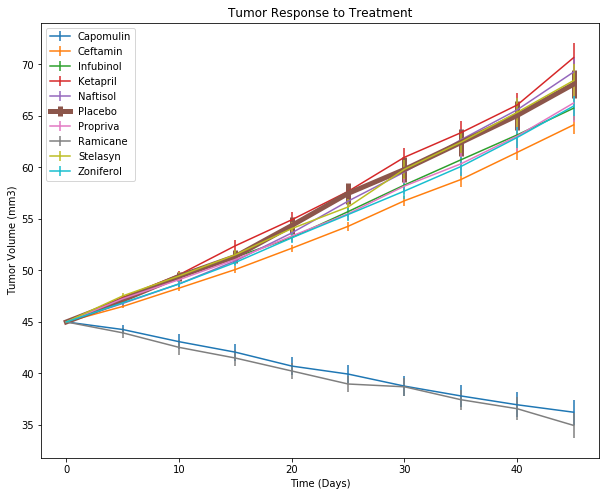

In [120]:
# Generate the Plot (with Error Bars)
plt.figure(figsize=(10, 8))

plt.title("Tumor Response to Treatment")
colors = list(mcolors.TABLEAU_COLORS.values())

plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

for i, col in enumerate(df_mean_tum_piv.columns.values):
    # Make placebo bold
    if col == "Placebo":
        plt.errorbar(x=df_mean_tum_piv.index.values, y=df_mean_tum_piv[col], yerr=df_se_tum_piv[col], c=colors[i],
                    linewidth=5)
    else:
        plt.errorbar(x=df_mean_tum_piv.index.values, y=df_mean_tum_piv[col], yerr=df_se_tum_piv[col], c=colors[i])
    
plt.legend(df_mean_tum_piv.columns.values)
plt.show()

## Metastatic Response to Treatment

In [112]:
# mean metastatic sites by drug and timepoint
mean_met_dict = {"Drug": [],
                  "Timepoint": [],
                  "Metastatic Sites": []}

# standard error of mean
se_met_dict = {"Drug": [],
               "Timepoint": [],
               "Metastatic Sites": []}

for drug, data in df_grouped:
    drug_name = drug[0]
    timepoint = drug[1]
    mean_met = data["Metastatic Sites"].mean()
    se_met = data["Metastatic Sites"].sem()
    
    mean_met_dict["Drug"].append(drug_name)
    mean_met_dict["Timepoint"].append(timepoint)
    mean_met_dict["Metastatic Sites"].append(mean_met)
    
    se_met_dict["Drug"].append(drug_name)
    se_met_dict["Timepoint"].append(timepoint)
    se_met_dict["Metastatic Sites"].append(se_met)
    
df_mean_met = pd.DataFrame(mean_met_dict)
df_se_met = pd.DataFrame(se_met_dict)

In [114]:
df_mean_met.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [116]:
# Minor Data Munging to Re-Format the Data Frames
df_mean_met_piv = df_mean_met.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]
df_se_met_piv = df_se_met.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

# Preview that Reformatting worked
df_mean_met_piv.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


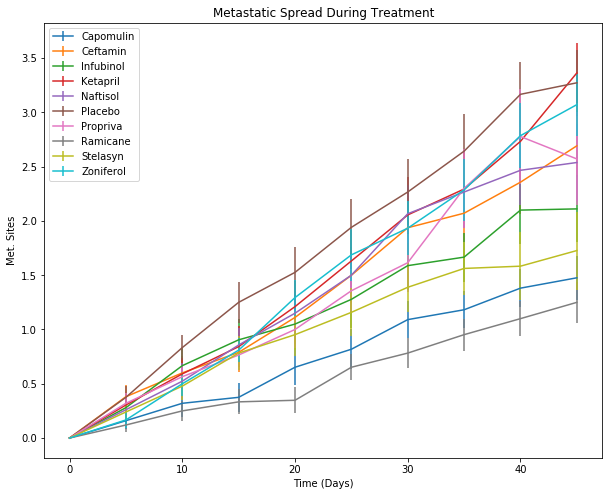

In [126]:
# Generate the Plot (with Error Bars)
plt.figure(figsize=(10, 8))

plt.title("Metastatic Spread During Treatment")
colors = list(mcolors.TABLEAU_COLORS.values())

plt.xlabel("Time (Days)")
plt.ylabel("Met. Sites")

for i, col in enumerate(df_mean_met_piv.columns.values):
    plt.errorbar(x=df_mean_met_piv.index.values, y=df_mean_met_piv[col], yerr=df_se_met_piv[col], c=colors[i])
    
plt.legend(df_mean_met_piv.columns.values)
plt.show()

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [131]:
# mean metastatic sites by drug and timepoint
mouse_count_dict = {"Drug": [],
                    "Timepoint": [],
                    "Mouse Count": []}


for drug, data in df_grouped:
    drug_name = drug[0]
    timepoint = drug[1]
    count = len(data["Mouse ID"].unique())
    
    mouse_count_dict["Drug"].append(drug_name)
    mouse_count_dict["Timepoint"].append(timepoint)
    mouse_count_dict["Mouse Count"].append(count)
    
df_mouse_count = pd.DataFrame(mouse_count_dict)

In [132]:
df_mouse_count.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [133]:
# Minor Data Munging to Re-Format the Data Frames
df_mouse_count_piv = df_mouse_count.pivot(index="Timepoint", columns="Drug")["Mouse Count"]

# Preview the Data Frame
df_mouse_count_piv.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17


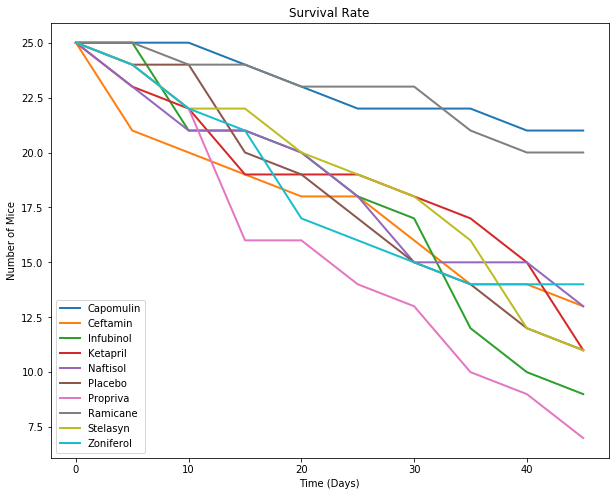

In [141]:
# Generate the Plot (with Error Bars)
plt.figure(figsize=(10, 8))

plt.title("Survival Rate")
colors = list(mcolors.TABLEAU_COLORS.values())

plt.xlabel("Time (Days)")
plt.ylabel("Number of Mice")

for i, col in enumerate(df_mouse_count_piv.columns.values):
    plt.plot(df_mouse_count_piv.index.values, df_mouse_count_piv[col], c=colors[i], linewidth=2)
    
plt.legend(df_mouse_count_piv.columns.values)
plt.show()

In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)